In [447]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

In [448]:
df = pd.read_csv('./merged_df_v4.csv')
df

,ID,time,extra_obs,special,type,lat,lon,vmax,mslp,wmo_basin,...,median_windgusts_10m,median_soil_temperature_0_to_7cm,median_soil_temperature_7_to_28cm,median_soil_temperature_28_to_100cm,median_soil_temperature_100_to_255cm,median_soil_moisture_0_to_7cm,median_soil_moisture_7_to_28cm,median_soil_moisture_28_to_100cm,median_soil_moisture_100_to_255cm,target_cost
0,804,9/16/1998 0:00,0,NaN,TD,10.0,-28.1,30,1009.0,north_atlantic,...,43.95,28.4,28.40,28.4,28.4,0.00,0.0,0.00,0.0,11191.0
1,980,9/14/2002 18:00,0,NaN,TD,10.0,-60.5,25,1009.0,north_atlantic,...,22.85,29.4,29.40,29.4,29.4,0.00,0.0,0.00,0.0,1943.5
2,923,9/21/2002 18:00,0,NaN,TD,10.2,-44.6,25,1009.0,north_atlantic,...,21.40,28.9,28.90,28.9,28.9,0.00,0.0,0.00,0.0,1866.6
3,1135,9/5/2004 18:00,0,NaN,HU,10.2,-46.8,110,955.0,north_atlantic,...,47.35,29.9,29.90,29.9,29.9,0.00,0.0,0.00,0.0,33005.8
4,981,9/15/2002 0:00,0,NaN,TD,10.2,-62.4,25,1009.0,north_atlantic,...,24.30,26.6,27.05,27.0,26.7,0.51,0.5,0.49,0.5,1943.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,1124,9/3/2004 0:00,0,NaN,TD,9.7,-28.7,30,1007.0,north_atlantic,...,36.40,28.2,28.20,28.2,28.2,0.00,0.0,0.00,0.0,33005.8
2727,1125,9/3/2004 6:00,0,NaN,TS,9.7,-30.3,35,1005.0,north_atlantic,...,44.45,28.1,28.10,28.1,28.1,0.00,0.0,0.00,0.0,33005.8
2728,803,9/15/1998 18:00,0,NaN,TD,9.8,-26.5,30,1009.0,north_atlantic,...,47.50,28.2,28.20,28.2,28.2,0.00,0.0,0.00,0.0,11191.0
2729,1134,9/5/2004 12:00,0,NaN,HU,9.8,-45.1,85,977.0,north_atlantic,...,60.70,29.4,29.40,29.4,29.4,0.00,0.0,0.00,0.0,33005.8


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731 entries, 0 to 2730
Columns: 146 entries, ID to target_cost
dtypes: float64(109), int64(25), object(12)
memory usage: 3.0+ MB


In [425]:
na_counts = df.isna().sum()
na_columns = na_counts[na_counts > 0]
na_columns


special                  2533
mslp                        2
elevation                1507
min_precipitationmin_    2731
min_snow_depth           1965
max_snow_depth           1965
avg_snow_depth           1965
median_snow_depth        1965
dtype: int64

In [426]:
df.describe()

,ID,extra_obs,lat,lon,vmax,mslp,year,Deaths,elevation,new_elevation,...,median_windgusts_10m,median_soil_temperature_0_to_7cm,median_soil_temperature_7_to_28cm,median_soil_temperature_28_to_100cm,median_soil_temperature_100_to_255cm,median_soil_moisture_0_to_7cm,median_soil_moisture_7_to_28cm,median_soil_moisture_28_to_100cm,median_soil_moisture_100_to_255cm,target_cost
count,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2729.000000,2731.000000,2731.000000,1224.000000,2731.000000,...,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000
mean,1366.887221,0.064079,25.818198,-72.676456,64.077261,980.961891,2006.459905,136.037349,88.199346,42.660930,...,59.688429,26.223233,26.478250,26.632442,26.143153,0.123501,0.116690,0.096016,0.098085,25829.947492
std,789.677083,0.244939,9.432526,17.134033,34.956670,26.350280,11.547392,497.585671,179.264071,139.471223,...,27.923370,4.195854,4.098069,4.073296,4.556214,0.189272,0.182156,0.153677,0.157946,39341.299210
min,0.000000,0.000000,8.900000,-106.700000,10.000000,882.000000,1980.000000,0.000000,-5.000000,-5.000000,...,7.550000,3.450000,4.100000,4.100000,4.100000,0.000000,0.000000,0.000000,0.000000,1050.600000
25%,682.500000,0.000000,18.300000,-85.300000,35.000000,962.000000,1998.000000,11.000000,0.000000,0.000000,...,38.775000,25.050000,25.675000,26.100000,25.400000,0.000000,0.000000,0.000000,0.000000,2585.300000
50%,1367.000000,0.000000,25.000000,-76.200000,55.000000,990.000000,2005.000000,35.000000,5.000000,0.000000,...,54.000000,27.800000,28.000000,28.100000,28.000000,0.000000,0.000000,0.000000,0.000000,9713.600000
75%,2050.500000,0.000000,31.350000,-63.500000,90.000000,1003.000000,2018.000000,57.000000,106.250000,0.000000,...,77.475000,28.900000,28.900000,29.000000,28.900000,0.330000,0.280000,0.210000,0.210000,29040.000000
max,2734.000000,1.000000,64.000000,-9.900000,165.000000,1018.000000,2022.000000,2981.000000,2061.000000,2007.000000,...,158.750000,30.900000,33.050000,34.200000,31.950000,0.760000,0.760000,0.690000,0.660000,195046.100000


In [427]:
# rename target column:
df.rename(columns={'Total CPI-Adjusted Cost (Millions of Dollars)': 'target_cost'}, inplace=True)


In [428]:
df = df[['ID',
 'time',
 'extra_obs',
 'special',
 'type',
 'lat',
 'lon',
 'vmax',
 'mslp',
 'wmo_basin',
 'storm_name',
 'year',
 'Name',
 'Disaster',
 'Begin Date',
 'End Date',
 'Deaths',
 'name',
 'elevation',
 'new_elevation',
 'date',
 'time_only',
 'day',
 'month',
 'min_temperature_2m',
 'min_relativehumidity_2m',
 'min_dewpoint_2m',
 'min_apparent_temperature',
 'min_precipitationmin_',
 'min_rain',
 'min_snowfall',
 'min_snow_depth',
 'min_weathercode',
 'min_pressure_msl',
 'min_surface_pressure',
 'min_cloudcover',
 'min_cloudcover_low',
 'min_cloudcover_mid',
 'min_cloudcover_high',
 'min_et0_fao_evapotranspiration',
 'min_vapor_pressure_deficit',
 'min_windspeed_10m',
 'min_windspeed_100m',
 'min_winddirection_10m',
 'min_winddirection_100m',
 'min_windgusts_10m',
 'min_soil_temperature_0_to_7cm',
 'min_soil_temperature_7_to_28cm',
 'min_soil_temperature_28_to_100cm',
 'min_soil_temperature_100_to_255cm',
 'min_soil_moisture_0_to_7cm',
 'min_soil_moisture_7_to_28cm',
 'min_soil_moisture_28_to_100cm',
 'min_soil_moisture_100_to_255cm',
 'max_temperature_2m',
 'max_relativehumidity_2m',
 'max_dewpoint_2m',
 'max_apparent_temperature',
 'max_precipitation',
 'max_rain',
 'max_snowfall',
 'max_snow_depth',
 'max_weathercode',
 'max_pressure_msl',
 'max_surface_pressure',
 'max_cloudcover',
 'max_cloudcover_low',
 'max_cloudcover_mid',
 'max_cloudcover_high',
 'max_et0_fao_evapotranspiration',
 'max_vapor_pressure_deficit',
 'max_windspeed_10m',
 'max_windspeed_100m',
 'max_winddirection_10m',
 'max_winddirection_100m',
 'max_windgusts_10m',
 'max_soil_temperature_0_to_7cm',
 'max_soil_temperature_7_to_28cm',
 'max_soil_temperature_28_to_100cm',
 'max_soil_temperature_100_to_255cm',
 'max_soil_moisture_0_to_7cm',
 'max_soil_moisture_7_to_28cm',
 'max_soil_moisture_28_to_100cm',
 'max_soil_moisture_100_to_255cm',
 'avg_temperature_2m',
 'avg_relativehumidity_2m',
 'avg_dewpoint_2m',
 'avg_apparent_temperature',
 'avg_precipitation',
 'avg_rain',
 'avg_snowfall',
 'avg_snow_depth',
 'avg_weathercode',
 'avg_pressure_msl',
 'avg_surface_pressure',
 'avg_cloudcover',
 'avg_cloudcover_low',
 'avg_cloudcover_mid',
 'avg_cloudcover_high',
 'avg_et0_fao_evapotranspiration',
 'avg_vapor_pressure_deficit',
 'avg_windspeed_10m',
 'avg_windspeed_100m',
 'avg_winddirection_10m',
 'avg_winddirection_100m',
 'avg_windgusts_10m',
 'avg_soil_temperature_0_to_7cm',
 'avg_soil_temperature_7_to_28cm',
 'avg_soil_temperature_28_to_100cm',
 'avg_soil_temperature_100_to_255cm',
 'avg_soil_moisture_0_to_7cm',
 'avg_soil_moisture_7_to_28cm',
 'avg_soil_moisture_28_to_100cm',
 'avg_soil_moisture_100_to_255cm',
 'min_precipitation',
 'median_temperature_2m',
 'median_relativehumidity_2m',
 'median_dewpoint_2m',
 'median_apparent_temperature',
 'median_precipitation',
 'median_rain',
 'median_snowfall',
 'median_snow_depth',
 'median_weathercode',
 'median_pressure_msl',
 'median_surface_pressure',
 'median_cloudcover',
 'median_cloudcover_low',
 'median_cloudcover_mid',
 'median_cloudcover_high',
 'median_et0_fao_evapotranspiration',
 'median_vapor_pressure_deficit',
 'median_windspeed_10m',
 'median_windspeed_100m',
 'median_winddirection_10m',
 'median_winddirection_100m',
 'median_windgusts_10m',
 'median_soil_temperature_0_to_7cm',
 'median_soil_temperature_7_to_28cm',
 'median_soil_temperature_28_to_100cm',
 'median_soil_temperature_100_to_255cm',
 'median_soil_moisture_0_to_7cm',
 'median_soil_moisture_7_to_28cm',
 'median_soil_moisture_28_to_100cm',
 'median_soil_moisture_100_to_255cm',
  'target_cost']]

In [429]:
df.to_csv('./merged_df_v4.csv', index = False)
df = pd.read_csv('./merged_df_v4.csv')
df.columns

Index(['ID', 'time', 'extra_obs', 'special', 'type', 'lat', 'lon', 'vmax',
       'mslp', 'wmo_basin',
       ...
       'median_windgusts_10m', 'median_soil_temperature_0_to_7cm',
       'median_soil_temperature_7_to_28cm',
       'median_soil_temperature_28_to_100cm',
       'median_soil_temperature_100_to_255cm', 'median_soil_moisture_0_to_7cm',
       'median_soil_moisture_7_to_28cm', 'median_soil_moisture_28_to_100cm',
       'median_soil_moisture_100_to_255cm', 'target_cost'],
      dtype='object', length=146)

In [430]:
from datetime import datetime

df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day


### Ensure Numeric Data: Make sure that you are only trying to calculate correlations with numeric data.
#### Creating a separate dataframe that only includes the numeric columns.

In [431]:
df_num = df.select_dtypes(include=['float64', 'int64'])

In [432]:
# df_num.drop(columns=['ID'], axis=1, inplace=True)

In [433]:
df_num

,ID,extra_obs,lat,lon,vmax,mslp,Deaths,elevation,new_elevation,min_temperature_2m,...,median_windgusts_10m,median_soil_temperature_0_to_7cm,median_soil_temperature_7_to_28cm,median_soil_temperature_28_to_100cm,median_soil_temperature_100_to_255cm,median_soil_moisture_0_to_7cm,median_soil_moisture_7_to_28cm,median_soil_moisture_28_to_100cm,median_soil_moisture_100_to_255cm,target_cost
0,804,0,10.0,-28.1,30,1009.0,16,NaN,0,25.5,...,43.95,28.4,28.40,28.4,28.4,0.00,0.0,0.00,0.0,11191.0
1,980,0,10.0,-60.5,25,1009.0,5,0.0,0,25.6,...,22.85,29.4,29.40,29.4,29.4,0.00,0.0,0.00,0.0,1943.5
2,923,0,10.2,-44.6,25,1009.0,2,NaN,0,25.1,...,21.40,28.9,28.90,28.9,28.9,0.00,0.0,0.00,0.0,1866.6
3,1135,0,10.2,-46.8,110,955.0,57,NaN,0,25.8,...,47.35,29.9,29.90,29.9,29.9,0.00,0.0,0.00,0.0,33005.8
4,981,0,10.2,-62.4,25,1009.0,5,0.0,0,24.6,...,24.30,26.6,27.05,27.0,26.7,0.51,0.5,0.49,0.5,1943.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,1124,0,9.7,-28.7,30,1007.0,57,NaN,0,25.8,...,36.40,28.2,28.20,28.2,28.2,0.00,0.0,0.00,0.0,33005.8
2727,1125,0,9.7,-30.3,35,1005.0,57,NaN,0,25.2,...,44.45,28.1,28.10,28.1,28.1,0.00,0.0,0.00,0.0,33005.8
2728,803,0,9.8,-26.5,30,1009.0,16,NaN,0,25.5,...,47.50,28.2,28.20,28.2,28.2,0.00,0.0,0.00,0.0,11191.0
2729,1134,0,9.8,-45.1,85,977.0,57,NaN,0,25.7,...,60.70,29.4,29.40,29.4,29.4,0.00,0.0,0.00,0.0,33005.8


In [434]:
# imputing elevation from NaN to 0 as those are sea level
df_num['elevation'] = df_num['elevation'].fillna(0)

In [435]:
df_num[df_num['elevation'] > 0]

,ID,extra_obs,lat,lon,vmax,mslp,Deaths,elevation,new_elevation,min_temperature_2m,...,median_windgusts_10m,median_soil_temperature_0_to_7cm,median_soil_temperature_7_to_28cm,median_soil_temperature_28_to_100cm,median_soil_temperature_100_to_255cm,median_soil_moisture_0_to_7cm,median_soil_moisture_7_to_28cm,median_soil_moisture_28_to_100cm,median_soil_moisture_100_to_255cm,target_cost
131,1826,1,13.1,-59.6,40,1004.0,89,23.0,38,25.2,...,44.30,27.05,27.9,28.4,28.30,0.33,0.31,0.21,0.13,155000.0
138,1828,1,13.2,-61.2,40,1004.0,89,589.0,513,22.0,...,45.70,25.20,25.2,25.2,25.20,0.00,0.00,0.00,0.00,155000.0
195,2414,1,13.8,-83.5,120,940.0,12,1.0,1,24.7,...,89.60,27.10,27.3,27.9,28.10,0.26,0.26,0.26,0.26,1708.3
196,2415,0,13.8,-83.7,95,965.0,12,4.0,7,23.1,...,56.50,24.35,24.9,26.1,27.00,0.49,0.48,0.49,0.54,1708.3
197,2416,0,13.8,-84.3,70,980.0,12,38.0,43,23.0,...,46.10,23.95,24.5,25.7,26.50,0.48,0.48,0.45,0.49,1708.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,313,0,52.5,-60.5,40,993.0,86,375.0,378,2.8,...,33.65,7.80,9.2,10.0,9.10,0.32,0.32,0.27,0.30,22049.8
2692,314,0,53.0,-59.5,40,991.0,86,500.0,497,1.8,...,36.55,5.85,7.3,8.5,7.30,0.34,0.33,0.26,0.30,22049.8
2693,1648,0,53.0,-60.0,40,991.0,45,166.0,169,7.5,...,29.85,11.80,12.6,13.0,7.95,0.30,0.29,0.19,0.26,18216.9
2694,2659,0,53.1,-57.5,45,981.0,25,284.0,279,8.2,...,47.70,9.85,9.3,9.5,9.50,0.29,0.30,0.26,0.26,2585.3


# Dimensionality Reduction with Screen Plot and FactorAnalyzer

In [436]:
dict(df_num.isna().sum())

{'ID': 0,
 'extra_obs': 0,
 'lat': 0,
 'lon': 0,
 'vmax': 0,
 'mslp': 2,
 'Deaths': 0,
 'elevation': 0,
 'new_elevation': 0,
 'min_temperature_2m': 0,
 'min_relativehumidity_2m': 0,
 'min_dewpoint_2m': 0,
 'min_apparent_temperature': 0,
 'min_precipitationmin_': 2731,
 'min_rain': 0,
 'min_snowfall': 0,
 'min_snow_depth': 1965,
 'min_weathercode': 0,
 'min_pressure_msl': 0,
 'min_surface_pressure': 0,
 'min_cloudcover': 0,
 'min_cloudcover_low': 0,
 'min_cloudcover_mid': 0,
 'min_cloudcover_high': 0,
 'min_et0_fao_evapotranspiration': 0,
 'min_vapor_pressure_deficit': 0,
 'min_windspeed_10m': 0,
 'min_windspeed_100m': 0,
 'min_winddirection_10m': 0,
 'min_winddirection_100m': 0,
 'min_windgusts_10m': 0,
 'min_soil_temperature_0_to_7cm': 0,
 'min_soil_temperature_7_to_28cm': 0,
 'min_soil_temperature_28_to_100cm': 0,
 'min_soil_temperature_100_to_255cm': 0,
 'min_soil_moisture_0_to_7cm': 0,
 'min_soil_moisture_7_to_28cm': 0,
 'min_soil_moisture_28_to_100cm': 0,
 'min_soil_moisture_100_t

In [437]:
# drop snow features
df_num.drop(columns=['avg_snow_depth', 'avg_snowfall',
                     'median_snow_depth', 'median_snowfall',
                     'min_snow_depth', 'min_snowfall',
                     'max_snow_depth', 'max_snowfall'], axis=1, inplace=True)

In [438]:
dict(df_num.isna().sum())

{'ID': 0,
 'extra_obs': 0,
 'lat': 0,
 'lon': 0,
 'vmax': 0,
 'mslp': 2,
 'Deaths': 0,
 'elevation': 0,
 'new_elevation': 0,
 'min_temperature_2m': 0,
 'min_relativehumidity_2m': 0,
 'min_dewpoint_2m': 0,
 'min_apparent_temperature': 0,
 'min_precipitationmin_': 2731,
 'min_rain': 0,
 'min_weathercode': 0,
 'min_pressure_msl': 0,
 'min_surface_pressure': 0,
 'min_cloudcover': 0,
 'min_cloudcover_low': 0,
 'min_cloudcover_mid': 0,
 'min_cloudcover_high': 0,
 'min_et0_fao_evapotranspiration': 0,
 'min_vapor_pressure_deficit': 0,
 'min_windspeed_10m': 0,
 'min_windspeed_100m': 0,
 'min_winddirection_10m': 0,
 'min_winddirection_100m': 0,
 'min_windgusts_10m': 0,
 'min_soil_temperature_0_to_7cm': 0,
 'min_soil_temperature_7_to_28cm': 0,
 'min_soil_temperature_28_to_100cm': 0,
 'min_soil_temperature_100_to_255cm': 0,
 'min_soil_moisture_0_to_7cm': 0,
 'min_soil_moisture_7_to_28cm': 0,
 'min_soil_moisture_28_to_100cm': 0,
 'min_soil_moisture_100_to_255cm': 0,
 'max_temperature_2m': 0,
 'max_

In [439]:
# drop 'min_precipitationmin_': 2731 na values
df_num.drop(columns=['min_precipitationmin_'], axis=1, inplace=True)

In [440]:
# dropping unecessary and redundant columns
df_num.drop(columns=['mslp', 'vmax', 'lat', 'lon', 'extra_obs', 'elevation'], axis=1, inplace=True)

In [441]:
df_num

,ID,Deaths,new_elevation,min_temperature_2m,min_relativehumidity_2m,min_dewpoint_2m,min_apparent_temperature,min_rain,min_weathercode,min_pressure_msl,...,median_windgusts_10m,median_soil_temperature_0_to_7cm,median_soil_temperature_7_to_28cm,median_soil_temperature_28_to_100cm,median_soil_temperature_100_to_255cm,median_soil_moisture_0_to_7cm,median_soil_moisture_7_to_28cm,median_soil_moisture_28_to_100cm,median_soil_moisture_100_to_255cm,target_cost
0,804,16,0,25.5,78,23.4,26.3,0.0,1,1009.4,...,43.95,28.4,28.40,28.4,28.4,0.00,0.0,0.00,0.0,11191.0
1,980,5,0,25.6,77,23.0,28.2,0.0,0,1008.7,...,22.85,29.4,29.40,29.4,29.4,0.00,0.0,0.00,0.0,1943.5
2,923,2,0,25.1,70,21.7,27.6,0.0,2,1010.9,...,21.40,28.9,28.90,28.9,28.9,0.00,0.0,0.00,0.0,1866.6
3,1135,57,0,25.8,79,23.5,24.1,0.0,1,1001.1,...,47.35,29.9,29.90,29.9,29.9,0.00,0.0,0.00,0.0,33005.8
4,981,5,0,24.6,75,23.4,29.2,0.0,1,1010.0,...,24.30,26.6,27.05,27.0,26.7,0.51,0.5,0.49,0.5,1943.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,1124,57,0,25.8,77,23.1,25.7,0.0,0,1009.2,...,36.40,28.2,28.20,28.2,28.2,0.00,0.0,0.00,0.0,33005.8
2727,1125,57,0,25.2,79,23.1,25.6,0.0,1,1009.1,...,44.45,28.1,28.10,28.1,28.1,0.00,0.0,0.00,0.0,33005.8
2728,803,16,0,25.5,75,22.5,24.2,0.0,2,1008.9,...,47.50,28.2,28.20,28.2,28.2,0.00,0.0,0.00,0.0,11191.0
2729,1134,57,0,25.7,75,23.2,22.6,0.0,1,1001.3,...,60.70,29.4,29.40,29.4,29.4,0.00,0.0,0.00,0.0,33005.8


In [442]:
df_num['name'] = df_num['ID'].map(df.set_index('ID')['name'])

In [443]:
df_num

,ID,Deaths,new_elevation,min_temperature_2m,min_relativehumidity_2m,min_dewpoint_2m,min_apparent_temperature,min_rain,min_weathercode,min_pressure_msl,...,median_soil_temperature_0_to_7cm,median_soil_temperature_7_to_28cm,median_soil_temperature_28_to_100cm,median_soil_temperature_100_to_255cm,median_soil_moisture_0_to_7cm,median_soil_moisture_7_to_28cm,median_soil_moisture_28_to_100cm,median_soil_moisture_100_to_255cm,target_cost,name
0,804,16,0,25.5,78,23.4,26.3,0.0,1,1009.4,...,28.4,28.40,28.4,28.4,0.00,0.0,0.00,0.0,11191.0,Georges
1,980,5,0,25.6,77,23.0,28.2,0.0,0,1008.7,...,29.4,29.40,29.4,29.4,0.00,0.0,0.00,0.0,1943.5,Isidore
2,923,2,0,25.1,70,21.7,27.6,0.0,2,1010.9,...,28.9,28.90,28.9,28.9,0.00,0.0,0.00,0.0,1866.6,Lili
3,1135,57,0,25.8,79,23.5,24.1,0.0,1,1001.1,...,29.9,29.90,29.9,29.9,0.00,0.0,0.00,0.0,33005.8,Ivan
4,981,5,0,24.6,75,23.4,29.2,0.0,1,1010.0,...,26.6,27.05,27.0,26.7,0.51,0.5,0.49,0.5,1943.5,Isidore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,1124,57,0,25.8,77,23.1,25.7,0.0,0,1009.2,...,28.2,28.20,28.2,28.2,0.00,0.0,0.00,0.0,33005.8,Ivan
2727,1125,57,0,25.2,79,23.1,25.6,0.0,1,1009.1,...,28.1,28.10,28.1,28.1,0.00,0.0,0.00,0.0,33005.8,Ivan
2728,803,16,0,25.5,75,22.5,24.2,0.0,2,1008.9,...,28.2,28.20,28.2,28.2,0.00,0.0,0.00,0.0,11191.0,Georges
2729,1134,57,0,25.7,75,23.2,22.6,0.0,1,1001.3,...,29.4,29.40,29.4,29.4,0.00,0.0,0.00,0.0,33005.8,Ivan


In [444]:
# df_num.to_csv('./df_num.csv', index=False)

In [387]:
dict(df_num.isna().sum())

{'ID': 0,
 'Deaths': 0,
 'new_elevation': 0,
 'min_temperature_2m': 0,
 'min_relativehumidity_2m': 0,
 'min_dewpoint_2m': 0,
 'min_apparent_temperature': 0,
 'min_rain': 0,
 'min_weathercode': 0,
 'min_pressure_msl': 0,
 'min_surface_pressure': 0,
 'min_cloudcover': 0,
 'min_cloudcover_low': 0,
 'min_cloudcover_mid': 0,
 'min_cloudcover_high': 0,
 'min_et0_fao_evapotranspiration': 0,
 'min_vapor_pressure_deficit': 0,
 'min_windspeed_10m': 0,
 'min_windspeed_100m': 0,
 'min_winddirection_10m': 0,
 'min_winddirection_100m': 0,
 'min_windgusts_10m': 0,
 'min_soil_temperature_0_to_7cm': 0,
 'min_soil_temperature_7_to_28cm': 0,
 'min_soil_temperature_28_to_100cm': 0,
 'min_soil_temperature_100_to_255cm': 0,
 'min_soil_moisture_0_to_7cm': 0,
 'min_soil_moisture_7_to_28cm': 0,
 'min_soil_moisture_28_to_100cm': 0,
 'min_soil_moisture_100_to_255cm': 0,
 'max_temperature_2m': 0,
 'max_relativehumidity_2m': 0,
 'max_dewpoint_2m': 0,
 'max_apparent_temperature': 0,
 'max_precipitation': 0,
 'max_r

In [388]:
df_factor = df_num.drop(columns=['ID','target_cost'], axis=1)

In [389]:
df_factor

,Deaths,new_elevation,min_temperature_2m,min_relativehumidity_2m,min_dewpoint_2m,min_apparent_temperature,min_rain,min_weathercode,min_pressure_msl,min_surface_pressure,...,median_winddirection_100m,median_windgusts_10m,median_soil_temperature_0_to_7cm,median_soil_temperature_7_to_28cm,median_soil_temperature_28_to_100cm,median_soil_temperature_100_to_255cm,median_soil_moisture_0_to_7cm,median_soil_moisture_7_to_28cm,median_soil_moisture_28_to_100cm,median_soil_moisture_100_to_255cm
0,16,0,25.5,78,23.4,26.3,0.0,1,1009.4,1009.4,...,181.5,43.95,28.4,28.40,28.4,28.4,0.00,0.0,0.00,0.0
1,5,0,25.6,77,23.0,28.2,0.0,0,1008.7,1008.7,...,67.5,22.85,29.4,29.40,29.4,29.4,0.00,0.0,0.00,0.0
2,2,0,25.1,70,21.7,27.6,0.0,2,1010.9,1010.9,...,170.0,21.40,28.9,28.90,28.9,28.9,0.00,0.0,0.00,0.0
3,57,0,25.8,79,23.5,24.1,0.0,1,1001.1,1001.1,...,33.5,47.35,29.9,29.90,29.9,29.9,0.00,0.0,0.00,0.0
4,5,0,24.6,75,23.4,29.2,0.0,1,1010.0,1010.0,...,108.0,24.30,26.6,27.05,27.0,26.7,0.51,0.5,0.49,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,57,0,25.8,77,23.1,25.7,0.0,0,1009.2,1009.2,...,183.0,36.40,28.2,28.20,28.2,28.2,0.00,0.0,0.00,0.0
2727,57,0,25.2,79,23.1,25.6,0.0,1,1009.1,1009.1,...,187.5,44.45,28.1,28.10,28.1,28.1,0.00,0.0,0.00,0.0
2728,16,0,25.5,75,22.5,24.2,0.0,2,1008.9,1008.9,...,310.5,47.50,28.2,28.20,28.2,28.2,0.00,0.0,0.00,0.0
2729,57,0,25.7,75,23.2,22.6,0.0,1,1001.3,1001.3,...,163.5,60.70,29.4,29.40,29.4,29.4,0.00,0.0,0.00,0.0


In [391]:
# df_factor.to_csv('./df_factor.csv', index=False)

In [390]:
# Checking if there are any missing values in df_factor
missing_values = df_factor.isna().sum().sum()

# Compute the correlation matrix
correlation_matrix = df_factor.corr()

# Extracting highly correlated features
# (not including the diagonal and considering only upper triangular matrix)
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Setting threshold as 0.8
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

(missing_values, len(highly_correlated_features), list(highly_correlated_features)[:5])  # Displaying first 5 for brevity


(0,
 79,
 ['median_surface_pressure',
  'min_soil_temperature_7_to_28cm',
  'median_soil_temperature_7_to_28cm',
  'min_dewpoint_2m',
  'min_soil_moisture_28_to_100cm'])

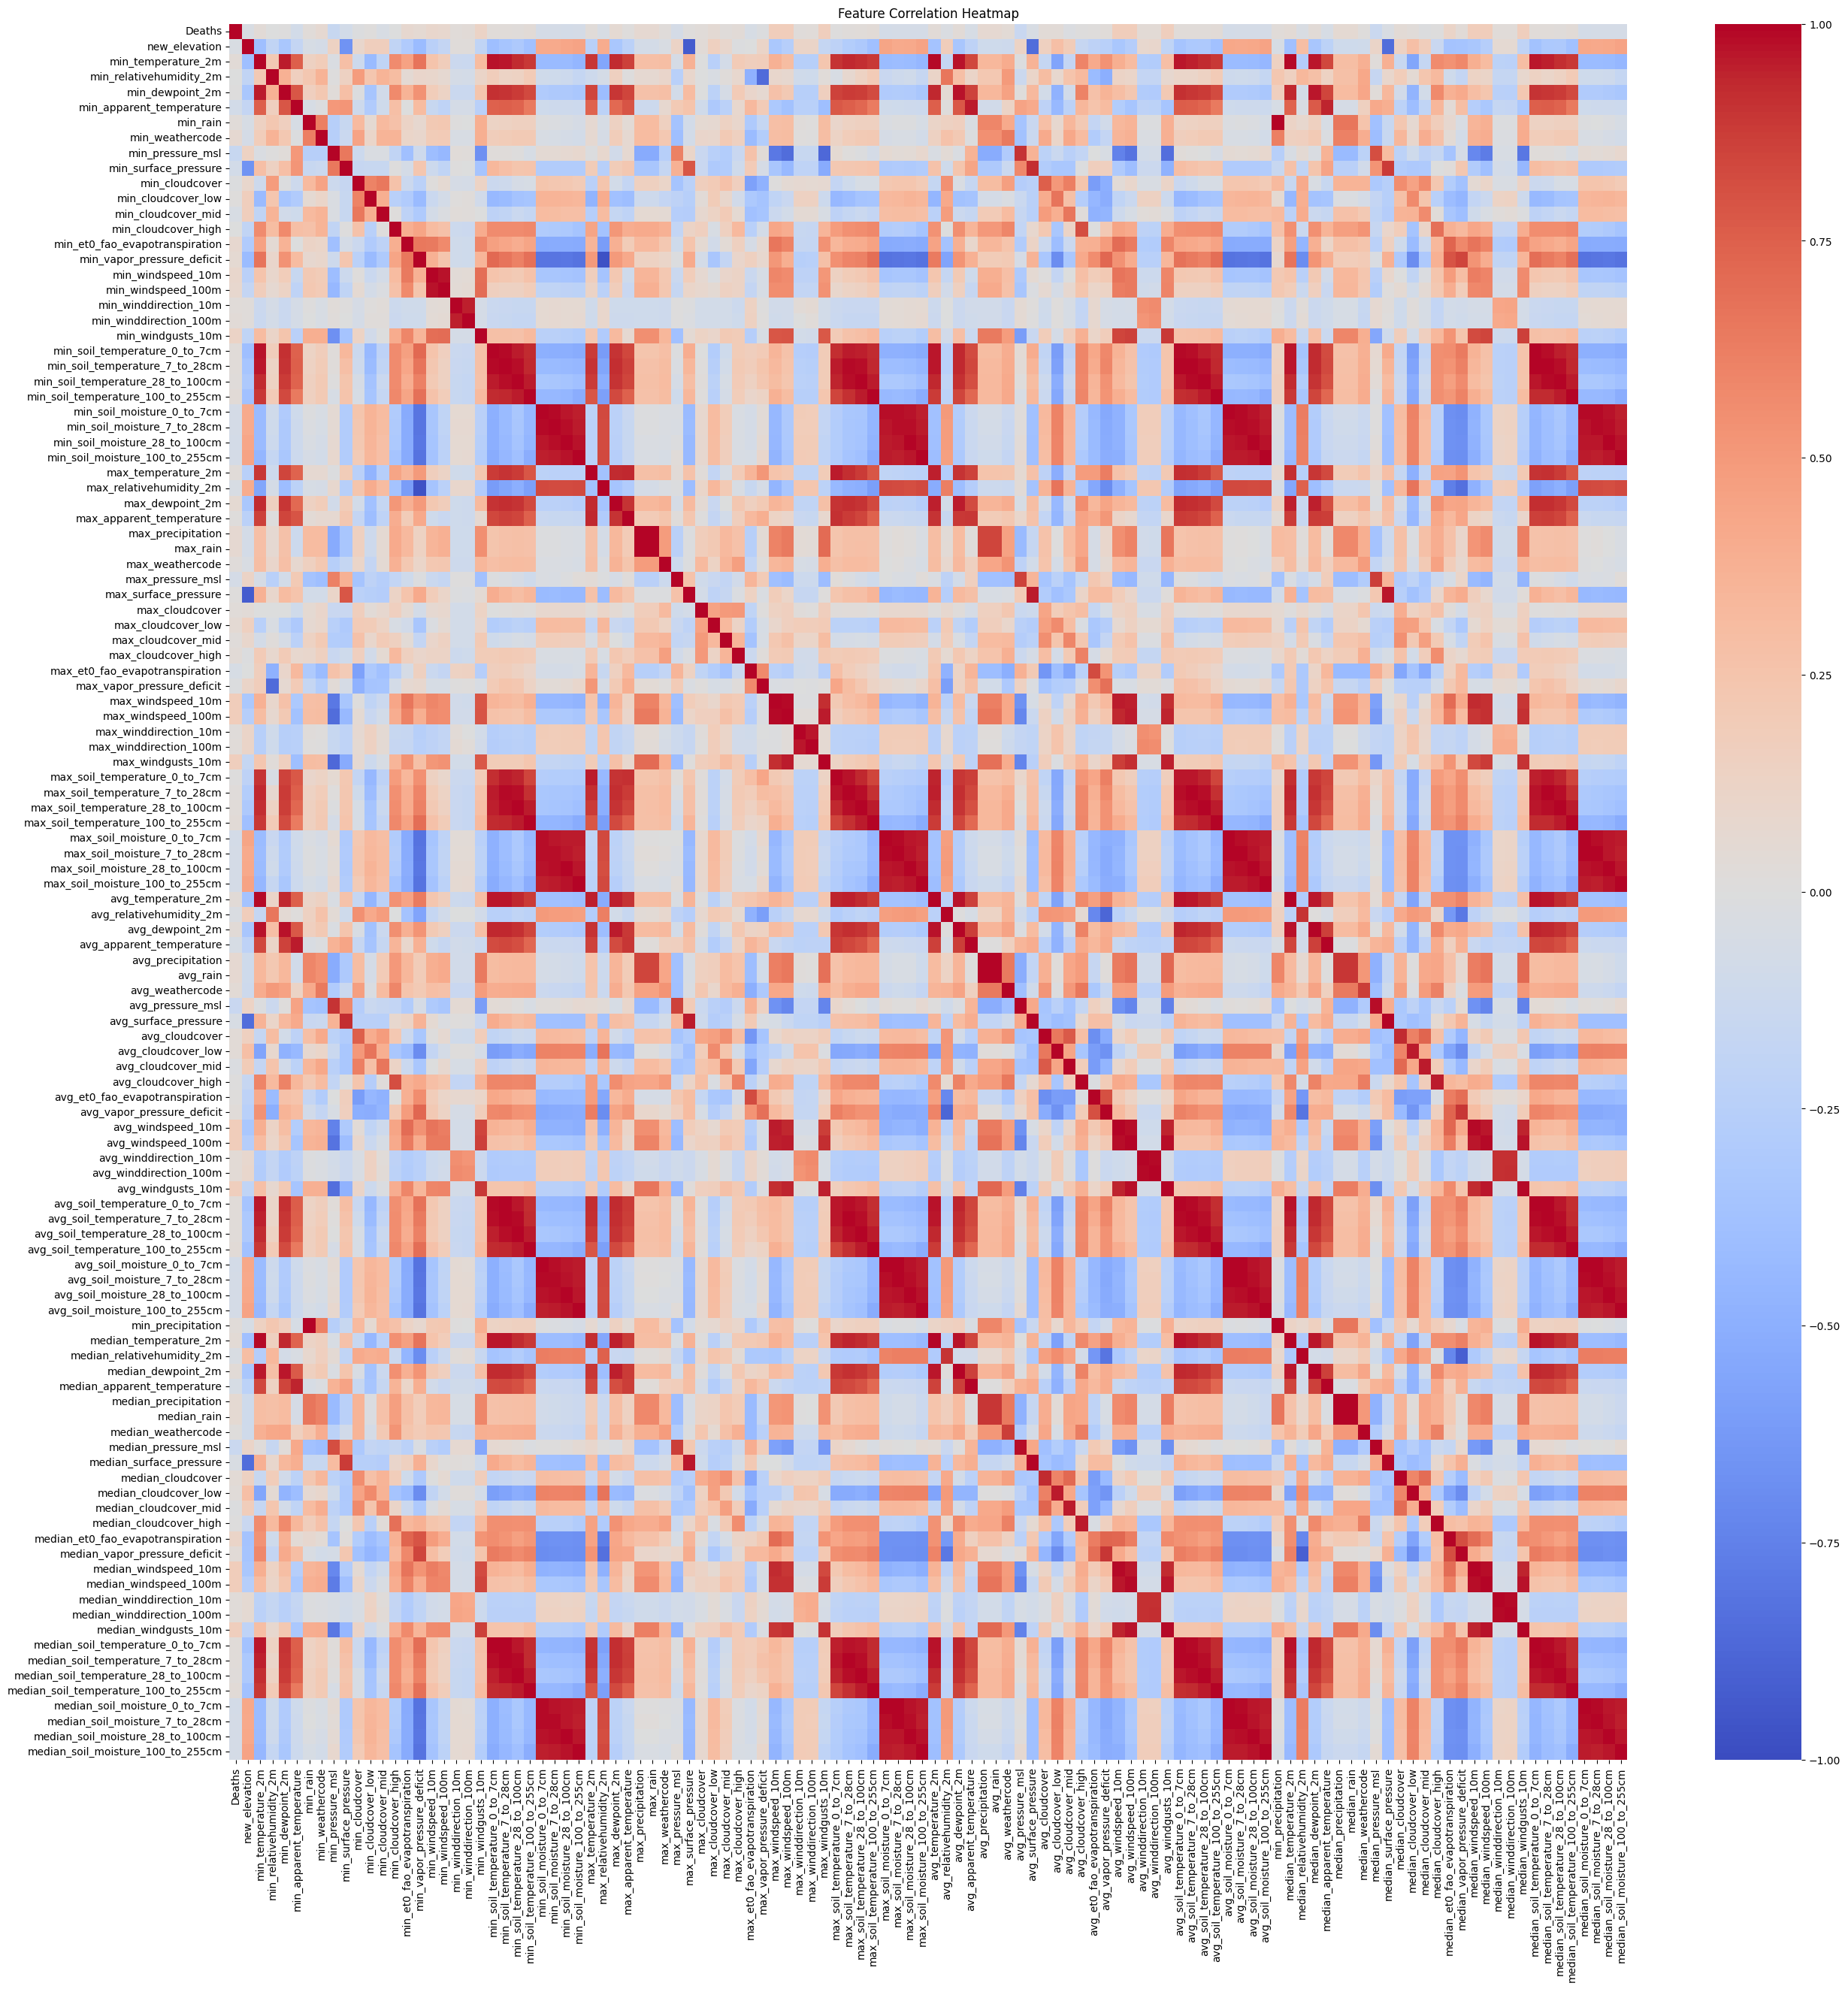

In [396]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for df_factor
correlation_matrix = df_factor.corr()

# Plot the correlation matrix using a heatmap for visualization
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()


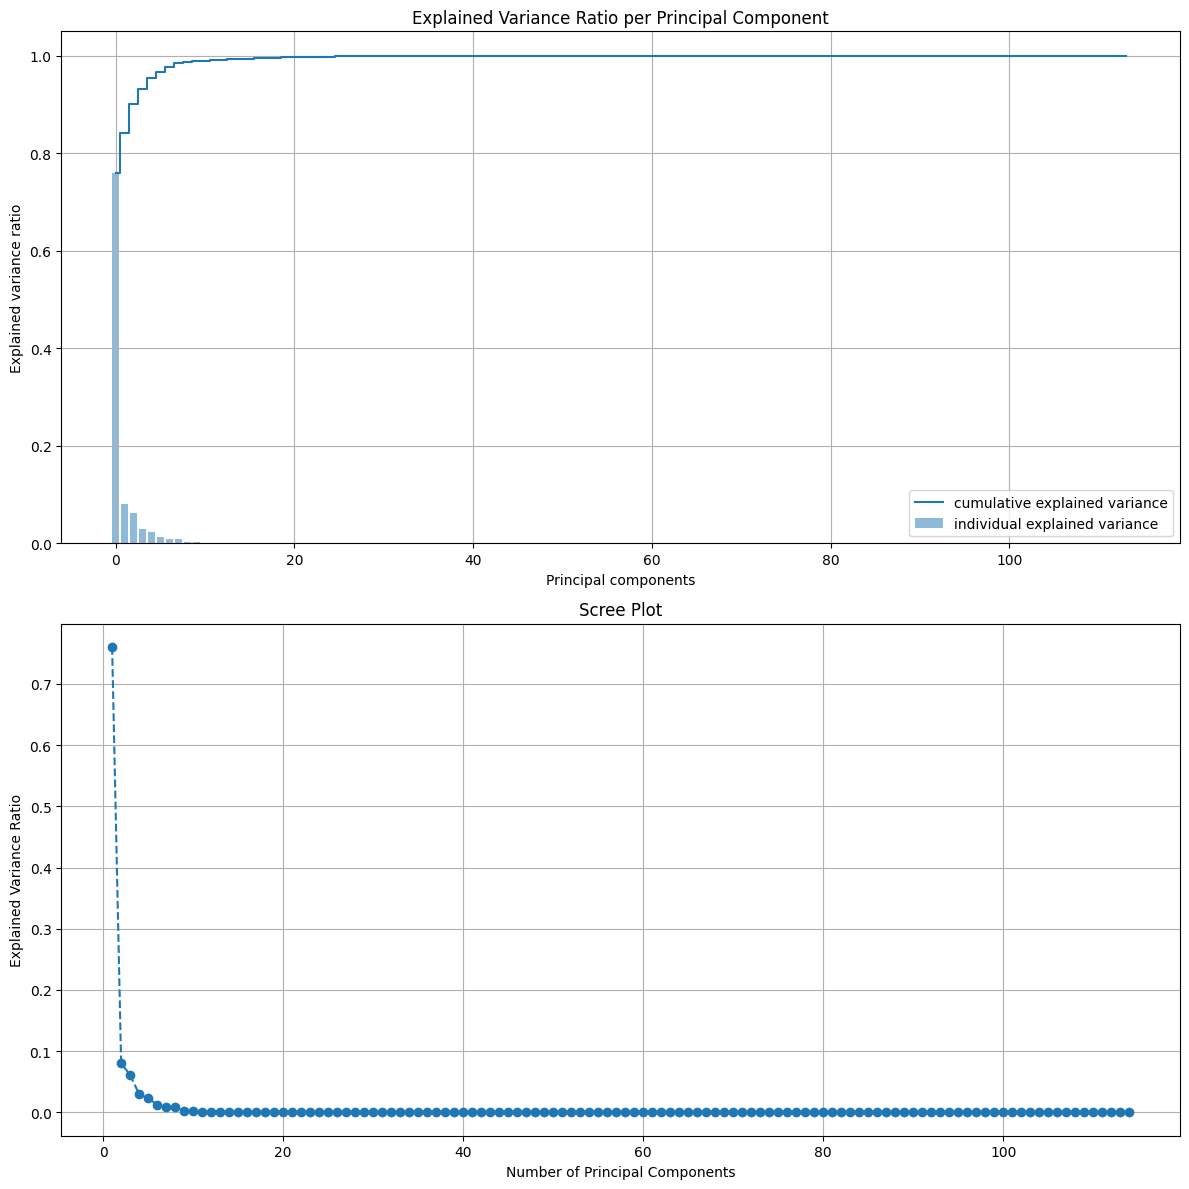

array([0.75999937, 0.840541  , 0.90170441, 0.93161735, 0.9547002 ,
       0.96754498, 0.97610491, 0.9845561 , 0.98662299, 0.98851059])

In [400]:
from sklearn.decomposition import PCA

# Initialize PCA and the X vector for dimensionality reduction
pca = PCA()

# Apply PCA
pca.fit(df_factor)

# Get explained variance of components
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the explained variance ratio and cumulative explained variance
plt.figure(figsize=(12, 12))

# Plotting the explained variance per principal component
plt.subplot(2, 1, 1)
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(cumulative_explained_variance)), cumulative_explained_variance, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.grid()
plt.title('Explained Variance Ratio per Principal Component')

# Scree plot
plt.subplot(2, 1, 2)
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.grid()
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.tight_layout()
plt.show()

# Displaying the cumulative explained variance ratio for the first few components
cumulative_explained_variance[:10]  # Displaying first 10 for brevity


In the figure above, the left plot shows both the individual explained variance and the cumulative explained variance by the principal components. The right plot (Scree Plot) provides a clear view of the explained variance for each principal component. 

In the cumulative explained variance array displayed:
\[ [0.76, 0.84, 0.90, 0.93, 0.95, 0.97, 0.98, 0.98, 0.99, 0.99] \]

We can observe that:
- The first principal component explains approximately 76% of the variance in the data.
- Two principal components together explain about 84%.
- Three principal components explain about 90%.

Typically, we aim to keep enough components to explain at least 80-90% of the variance. In this case, 2 or 3 components might be a good choice depending on the level of variance we want to retain.

Principal components are not the original features/columns of the dataframe. They are new variables formed by linear combinations of the original features. These principal components are constructed in such a way that:

1. Each principal component is orthogonal (uncorrelated) to the others.
2. The first principal component explains the most variance in the data, the second explains the second most, and so on.

Mathematically, if we have original variables $X_1, X_2, \ldots, X_p $, the first principal component $Z_1$ would be defined as:

$Z_1 = \phi_{11}X_1 + \phi_{21}X_2 + \ldots + \phi_{p1}X_p$

where $\phi_{11}, \phi_{21}, \ldots, \phi_{p1}$ are the loadings of the first principal component. These loadings are chosen in a way to maximize the variance of $Z_1$. The second principal component $Z_2$ is calculated similarly but under the condition that it is uncorrelated with $Z_1$, and so on.

In the context of our PCA analysis:

- If we choose 2 principal components, we create two new variables $Z_1$ and $Z_2$ which are linear combinations of our original features and explain as much of the variance in the data as possible with two variables.
- If we choose 3 principal components, we create three new variables $Z_1$, $Z_2$, and $Z_3$ under the same principle.

This transformation helps to reduce dimensionality (i.e., use fewer variables) while still retaining as much of the information (variance) as possible. This can be particularly useful for visualization, or when working with models that struggle with highly dimensional data or multicollinearity among predictors.


We'll proceed with creating 3 principal components. The steps will be as follows:

1. **Apply PCA** to create 3 principal components.
2. **Inspect the Components**: Understand how the original features contribute to the principal components.
3. **Visualize**: Optionally, visualize the data in the reduced-dimension space to observe any patterns or groupings.

Let’s get started by applying PCA and inspecting the resulting principal components!


In [401]:
# Apply PCA with 3 components
pca_3 = PCA(n_components=3)
principal_components = pca_3.fit_transform(df_factor)

# Transform the principal components into a DataFrame for easier handling
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Get the loadings
loadings = pca_3.components_.T

# Creating a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=df_factor.columns)

# Display the first few rows of the principal components and the loadings
(pc_df.head(), loadings_df.head())


(          PC1         PC2        PC3
 0 -121.230730   22.252204 -43.793847
 1 -136.723240 -185.667946  66.791341
 2 -137.330787  -40.165050 -28.807893
 3  -82.523274 -260.265833  88.856847
 4 -136.542550 -174.140441  41.289311,
                               PC1       PC2       PC3
 Deaths                   0.999328 -0.002125  0.020193
 new_elevation           -0.011819  0.435814  0.840396
 min_temperature_2m       0.000322 -0.012008 -0.007027
 min_relativehumidity_2m -0.000022 -0.012486 -0.004561
 min_dewpoint_2m          0.000047 -0.012161 -0.005433)


The first DataFrame shows the first few rows of the principal components (PC1, PC2, PC3) obtained for each observation in your dataset:

$
\begin{array}{|r|r|r|}
\hline
\text{PC1} & \text{PC2} & \text{PC3} \\
\hline
-121.23 & 22.25 & -43.79 \\
-136.72 & -185.67 & 66.79 \\
-137.33 & -40.17 & -28.81 \\
-82.52 & -260.27 & 88.86 \\
-136.54 & -174.14 & 41.29 \\
\hline
\end{array}
$

The second DataFrame shows how much each original feature contributes to each principal component. Here are the loadings for the first few features:

$
\begin{array}{|l|r|r|r|}
\hline
 & \text{PC1} & \text{PC2} & \text{PC3} \\
\hline
\text{Deaths} & 0.9993 & -0.0021 & 0.0202 \\
\text{new\_elevation} & -0.0118 & 0.4358 & 0.8404 \\
\text{min\_temperature\_2m} & 0.0003 & -0.0120 & -0.0070 \\
\text{min\_relativehumidity\_2m} & -0.0000 & -0.0125 & -0.0046 \\
\text{min\_dewpoint\_2m} & 0.0000 & -0.0122 & -0.0054 \\
\hline
\end{array}
$

The loadings can be interpreted as the weights of the original variables to obtain the principal components. High (either positive or negative) loadings indicate that the original variable strongly influences the principal component.


### 3D plot to visualize the data in the reduced-dimension space created by the first three principal components

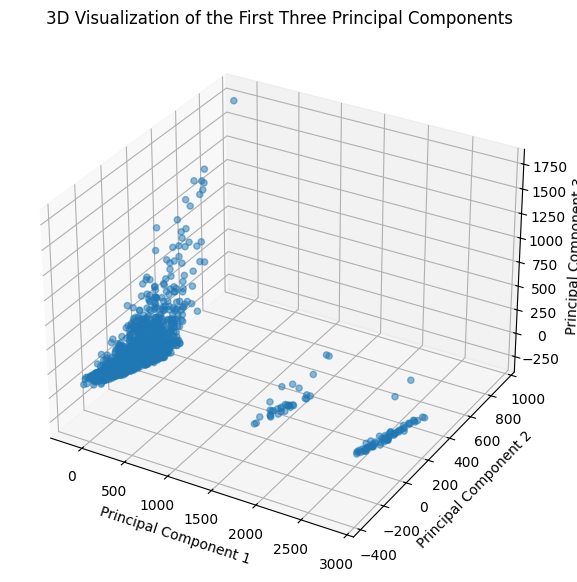

In [402]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in the 3D space using the principal components
ax.scatter(pc_df['PC1'], pc_df['PC2'], pc_df['PC3'], alpha=0.5)

# Adding labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Visualization of the First Three Principal Components")

plt.show()


The 3D plot visualizes the data in the reduced-dimension space spanned by the first three principal components (PC1, PC2, PC3). Each point in the plot represents an observation in your dataset, mapped into this reduced-dimension space.

Inspecting this plot might help you identify patterns, clusters, or outliers in the data when visualized using the principal components. While it's challenging to discern clear patterns in a 3D plot due to the lack of depth perception, this visualization can still be useful for getting a general sense of the data distribution in the reduced-dimension space.

From here, you may:
- **Identify Clusters**: If any clusters or groupings are visible, consider applying clustering algorithms to categorize them.
- **Outlier Detection**: Identify and investigate any points that appear distant from others, as these could be outliers or interesting cases.
- **Regression/Classification**: Use the principal components as predictors in a regression or classification model.


----------

Clarification on how PCA relates to feature reduction.

### Principal Component Analysis (PCA) for Feature Reduction

When we have a dataset with a large number of correlated variables (features), PCA allows us to summarize this data with fewer features, called principal components.

1. **Formation of Principal Components:**
   - The first principal component (PC1) is formed in such a way to capture the maximum variance in the data.
   - The second principal component (PC2) captures the second-highest variance, under the constraint that it is orthogonal to PC1, and so on.
   - Each PC is a linear combination of the original features.

2. **Dimensionality Reduction:**
   - Instead of using all original features, we use these PCs as new features to represent our data.
   - By selecting a subset of PCs (e.g., PC1, PC2, PC3), we can represent the dataset with reduced dimensionality while retaining most of the variance.
   - This reduced set of PCs can be used in subsequent analyses, reducing complexity and mitigating issues related to having too many features (like overfitting).

3. **Interpretation:**
   - PCs are not as interpretable as the original features since they are combinations of all original features.
   - However, by looking at the loadings of each PC (how much each original feature contributes to the PC), we can understand which original features are driving the variance captured by each PC.

### Application in Model Building:

- **Original Approach:** Use all original features to build a model.
- **PCA Approach:** Use the first few PCs to build a model, reducing the number of input variables.

### Example:

Imagine we have a dataset with 100 features (F1, F2, ..., F100). 

- Applying PCA might give us that PC1, PC2, and PC3 together explain 90% of the variance in the data.
- Instead of building a model with 100 original features, we can build it with PC1, PC2, and PC3, drastically reducing the complexity of our model.
- The model is not built with the original features but with the principal components, which are derived from the original features.

### Next Steps:
- We can proceed to use these principal components in modeling (e.g., regression, clustering) instead of using the original features.
- Alternatively, if you prefer feature selection (keeping a subset of your original features), other techniques might be more suitable.


## Training a model with PCA

When using PCA for modeling, you'll train your model using the principal components as predictors instead of the original features. The target variable is not involved in PCA and is used as-is when training the model. Here's how you might proceed:

### Step 1: Split the Data
You'll split your data into training and testing sets. This involves dividing both the PCs and the target variable into separate training and testing sets.

### Step 2: Model Training
You'll use the training set of PCs to train your model, using the corresponding target variable values.

### Step 3: Model Testing
You'll use the testing set of PCs to evaluate your model, using the corresponding target variable values for validation.

### Step 4: Model Application (if predicting future/unseen data)
If you have new data to predict:
- You'll need to transform it using the PCA model derived from your original data. This means applying the same linear transformations (based on the PCA loadings) to get the principal components for the new data.
- You can then use the model to predict the target variable for new data.

### Example Workflow:

#### A. Preprocessing
1. Split your original data (before PCA) into training and testing sets.
2. Apply PCA to the training data to derive the PCs.
3. Apply the same PCA transformation to the testing data to get its PCs.

#### B. Modeling
1. Train your model using PCs from the training data and the corresponding target variable.
2. Validate your model using PCs from the testing data and its actual target variable.

#### C. Predicting New Data
1. Transform the new data using the PCA model derived from the original training data to get its PCs.
2. Use the trained model to predict the target variable for the new data.

### Example Code (Hypothetical):
```python
# Splitting original data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_factor, target_variable, test_size=0.2, random_state=42)

# Applying PCA to training data
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

# Applying the same PCA transformation to testing data
X_test_pca = pca.transform(X_test)

# Training a model (e.g., regression) using PCs
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_pca, y_train)

# Validating the model using testing data
predictions = model.predict(X_test_pca)

# Evaluate the model (e.g., using mean squared error for regression)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
```
Note: Replace `target_variable` with your actual target variable column.

Does this workflow make sense for your use case, or would you like to explore other techniques or aspects of PCA further?

---------------------

The heatmap displays a subset of the correlation matrix, showing how 10 of the features correlate with each other. Darker blue and darker red indicate stronger negative and positive correlations, respectively.

There are 79 features that have a correlation greater than 0.8 with at least one other feature, suggesting potential redundancy. A few of these features are:

- median_soil_temperature_100_to_255cm
- min_windspeed_100m
- max_temperature_2m
- median_winddirection_10m
- avg_windspeed_100m

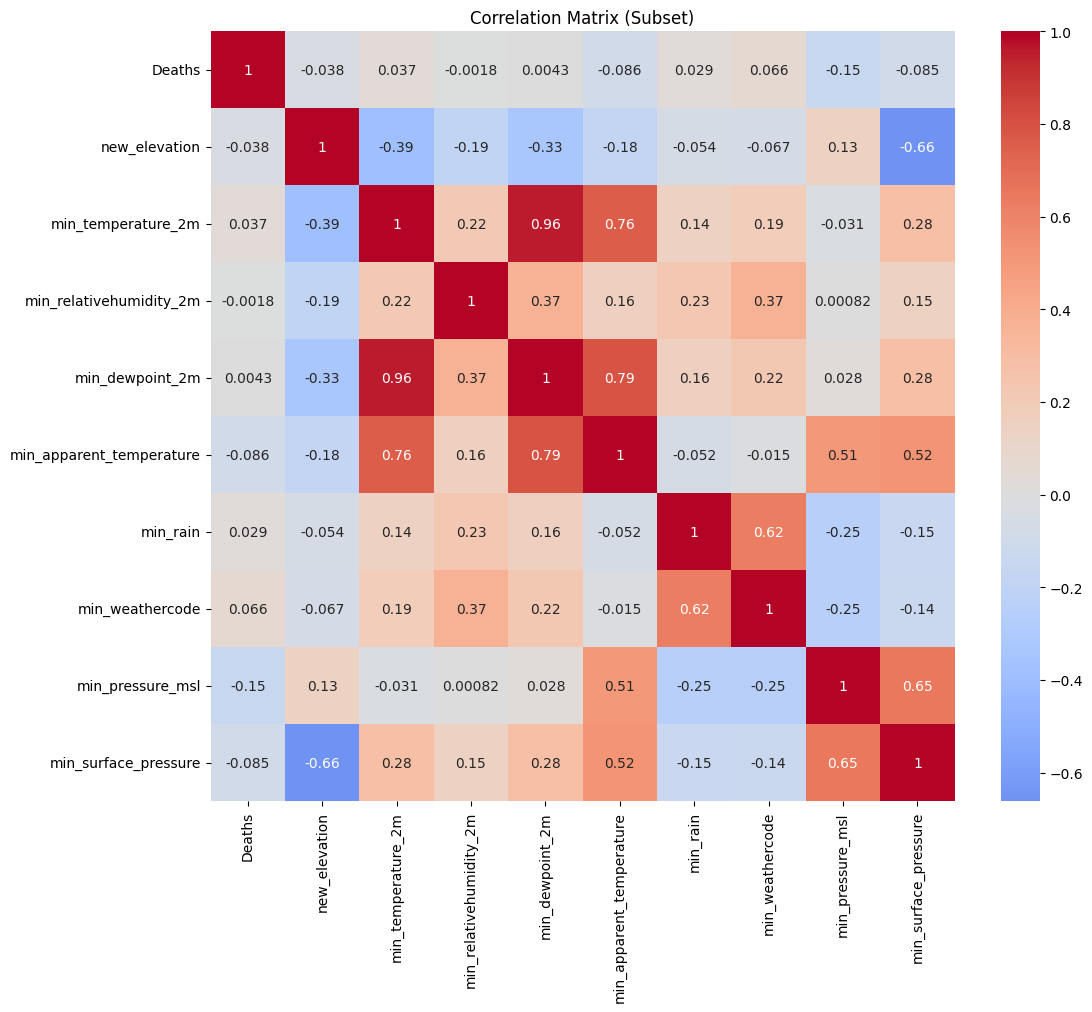

(79,
 ['median_surface_pressure',
  'min_soil_temperature_7_to_28cm',
  'median_soil_temperature_7_to_28cm',
  'min_dewpoint_2m',
  'min_soil_moisture_28_to_100cm'])

In [392]:
# # Correlation
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Compute the correlation matrix
# correlation_matrix = df_factor.corr()

# # Extracting highly correlated features (setting threshold as 0.8)
# highly_correlated_features = set()
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > 0.8:
#             colname = correlation_matrix.columns[i]
#             highly_correlated_features.add(colname)

# # Visualize the correlation matrix using a heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix.iloc[:10, :10], annot=True, cmap='coolwarm', center=0)  # Displaying a subset for readability
# plt.title('Correlation Matrix (Subset)')
# plt.show()

# (len(highly_correlated_features), list(highly_correlated_features)[:5])  # Displaying first 5 of 0.8 or greater corr


### Choosing the `rotation` and `n_factors`

1. **Choosing `rotation`:**
   - **Varimax:** Maximizes the sum of the variance of squared loadings (factor simplicity). It's orthogonal.
   - **Quartimax:** Minimizes the number of factors needed to explain each variable. It's also orthogonal.
   - **Promax:** An oblique method which allows for the correlation of factors. Useful if you assume underlying factors are correlated.
   
   Choose based on theoretical justification and try different rotations to see which provides the most interpretative clarity.

2. **Choosing `n_factors`:**
   - One common method to select `n_factors` is to look at the scree plot and find the "elbow", which is where the eigenvalues start to level off.
   - Another common method is the Kaiser criterion, which suggests retaining factors with eigenvalues greater than 1.
   
   However, with 114 variables, considering a scree plot might be challenging. You might run a preliminary factor analysis with no restriction on the number of factors and look for an "elbow" in the scree plot or apply the Kaiser criterion.

### Note on Large Data

With 114 columns, performing factor analysis might yield complex structures. Ensure to:
- **Preprocess well:** Ensure data is suitable for factor analysis (e.g., check for multicollinearity, scale variables, etc.).
- **Interpretability:** Always aim for a solution that provides clear and interpretable factors.
- **Validate:** Ensure that the factors make sense theoretically and consider validating with domain experts.

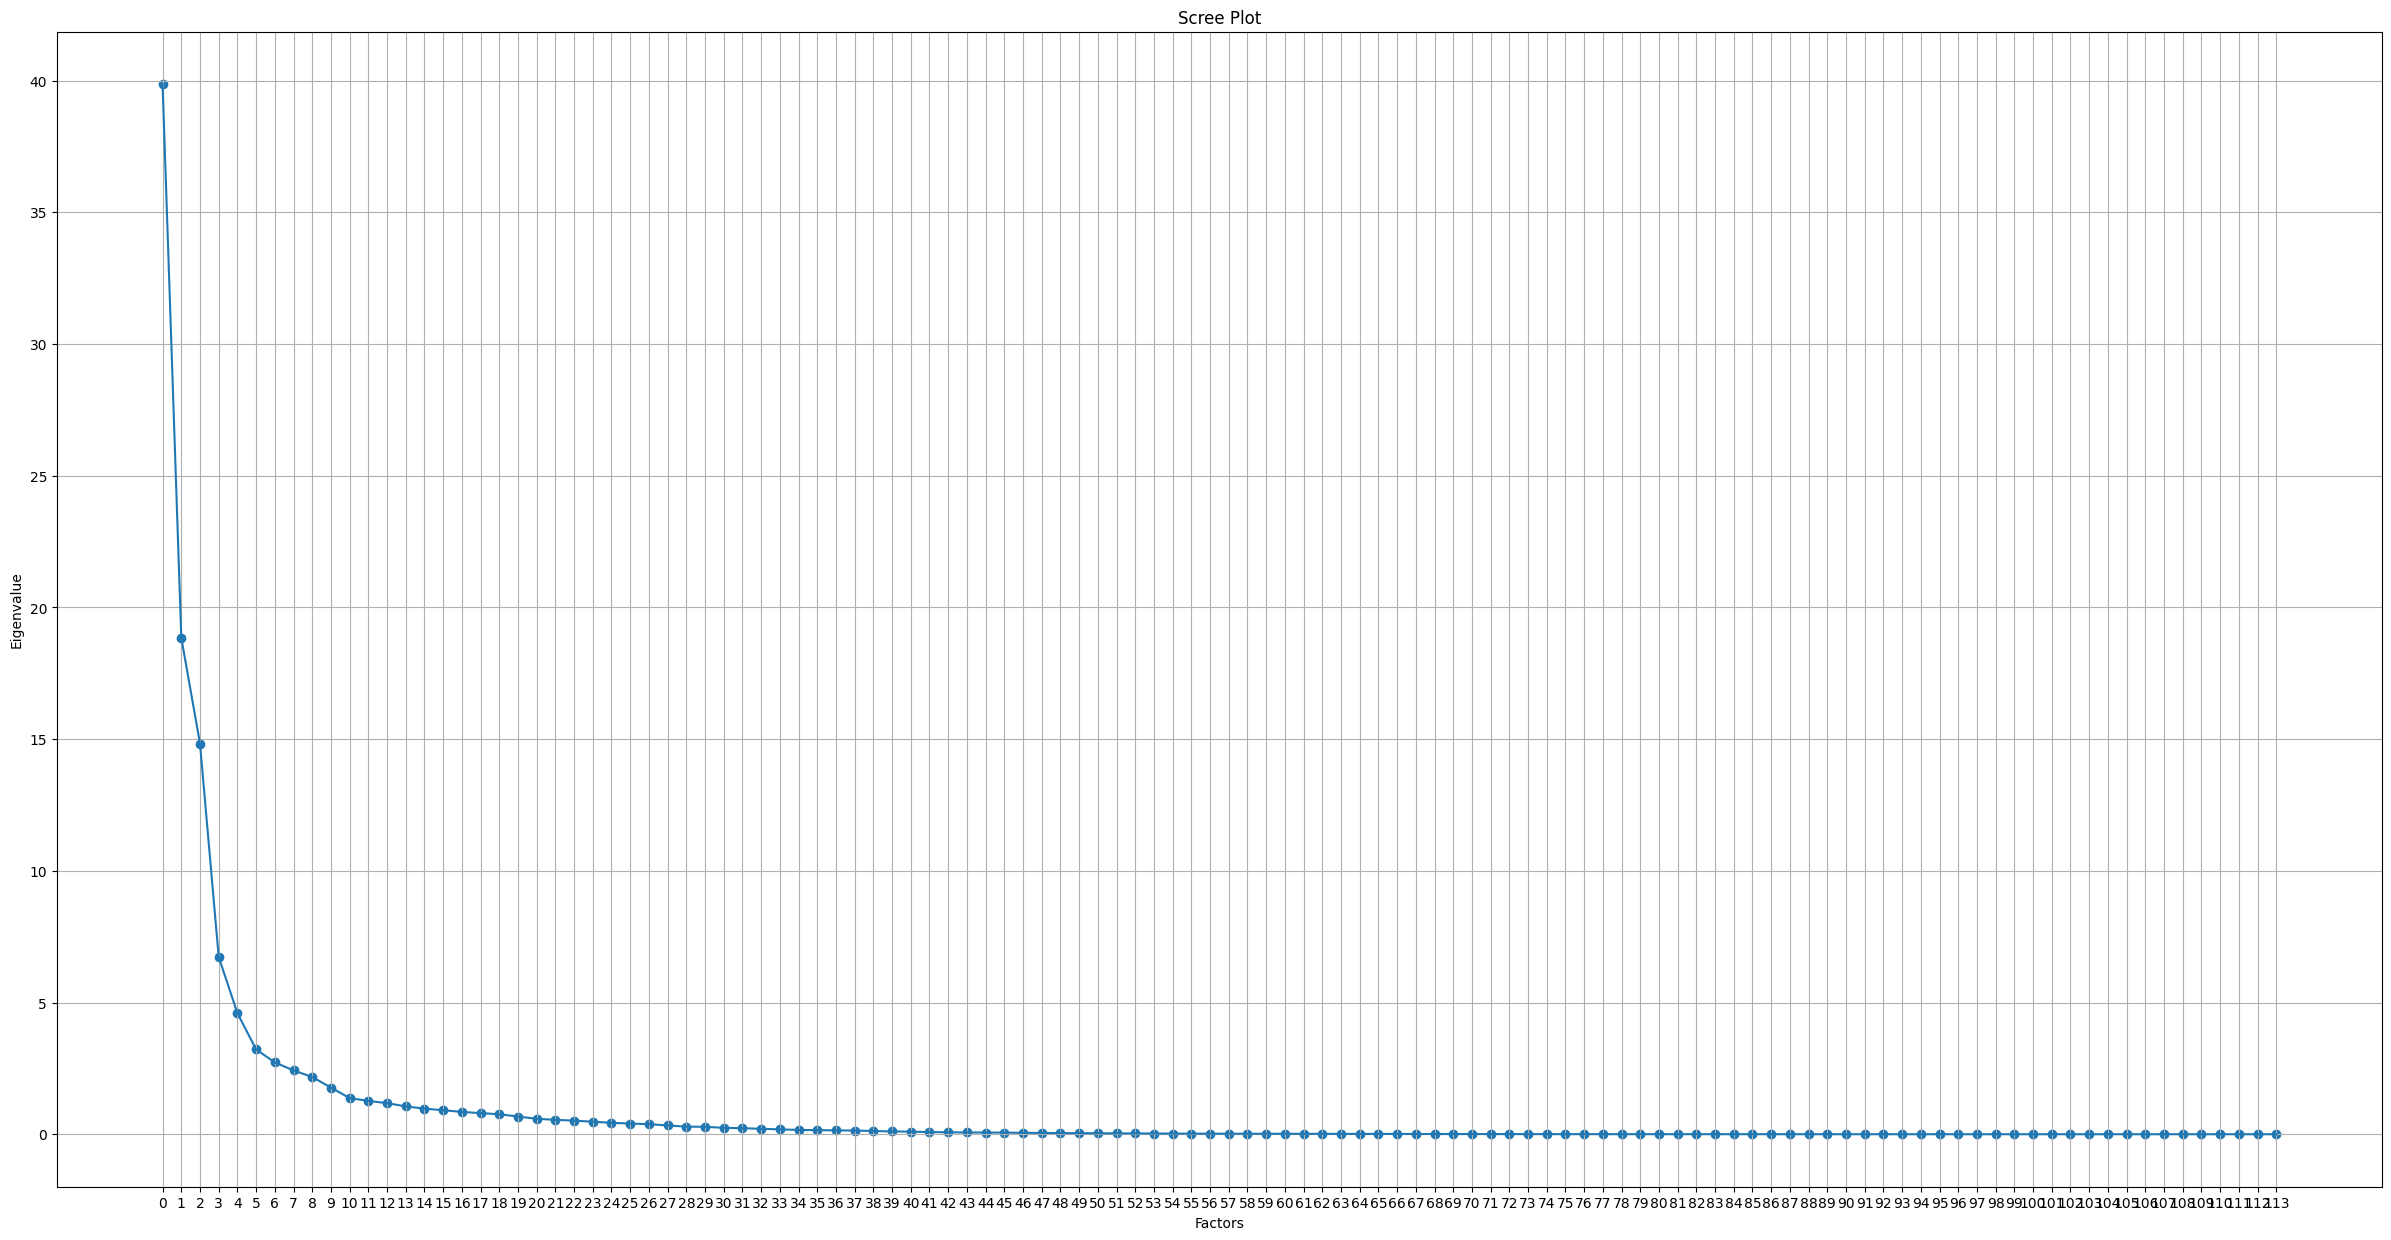

<Figure size 640x480 with 0 Axes>

In [363]:

# graphs the scree plot
factors = range(0,len(df_factor.columns))
plt.figure(figsize=(30,15))
plt.scatter(factors,ev)
plt.plot(factors,ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.xticks(factors)
plt.grid()
plt.show()
plt.savefig("./scree_plot.png")

In [367]:
# builds the factor model
fa = FactorAnalyzer(rotation="varimax", n_factors = 2)
# fa = FactorAnalyzer(rotation="promax", n_factors = 5)
fa.fit(df_factor)

# finds the eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.98622990e+01, 1.88512697e+01, 1.48324975e+01, 6.72867719e+00,
       4.59696590e+00, 3.21928026e+00, 2.72521260e+00, 2.42317661e+00,
       2.17185289e+00, 1.77038459e+00, 1.37267567e+00, 1.26612899e+00,
       1.17831913e+00, 1.05733219e+00, 9.71251325e-01, 9.10733369e-01,
       8.47457655e-01, 8.00896466e-01, 7.57746498e-01, 6.72708689e-01,
       5.86282262e-01, 5.45820269e-01, 5.16389956e-01, 4.75032703e-01,
       4.31774876e-01, 4.06310112e-01, 3.80792750e-01, 3.34409310e-01,
       2.86716719e-01, 2.82018144e-01, 2.42439393e-01, 2.29039628e-01,
       2.06178661e-01, 1.84120753e-01, 1.63121955e-01, 1.55934701e-01,
       1.45416239e-01, 1.39667283e-01, 1.23066530e-01, 1.04436960e-01,
       9.72719462e-02, 8.14178033e-02, 7.45733471e-02, 6.63567184e-02,
       6.49925753e-02, 6.11687675e-02, 5.28005550e-02, 4.87279320e-02,
       4.28770704e-02, 4.03464964e-02, 3.62386488e-02, 3.22861419e-02,
       3.05488102e-02, 2.72456900e-02, 2.37389581e-02, 2.21883165e-02,
      